In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Optionally map numeric targets to class labels
df['species'] = df['species'].map({i: label for i, label in enumerate(iris.target_names)})

# Introduce artificial missing values for demonstration
df.loc[5:7, 'sepal length (cm)'] = np.nan  # simulate missing data

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# 1. Handle missing values (impute using mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 2. Encode categorical labels
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

# 3. Prepare features and target variable
X = df[iris.feature_names]
y = df['species_encoded']

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Make predictions
y_pred = clf.predict(X_test)

# 7. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')

# 8. Display results
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Model Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 47s - 56ms/step - accuracy: 0.9181 - loss: 0.2637 - val_accuracy: 0.9808 - val_loss: 0.0647
Epoch 2/5
844/844 - 47s - 56ms/step - accuracy: 0.9705 - loss: 0.0979 - val_accuracy: 0.9865 - val_loss: 0.0426
Epoch 3/5
844/844 - 45s - 54ms/step - accuracy: 0.9789 - loss: 0.0721 - val_accuracy: 0.9892 - val_loss: 0.0377
Epoch 4/5
844/844 - 44s - 53ms/step - accuracy: 0.9825 - loss: 0.0578 - val_accuracy: 0.9905 - val_loss: 0.0332
Epoch 5/5
844/844 - 44s - 52ms/step - accuracy: 0.9856 - loss: 0.0489 - val_accuracy: 0.9900 - val_loss: 0.0364

✅ Test Accuracy: 99.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


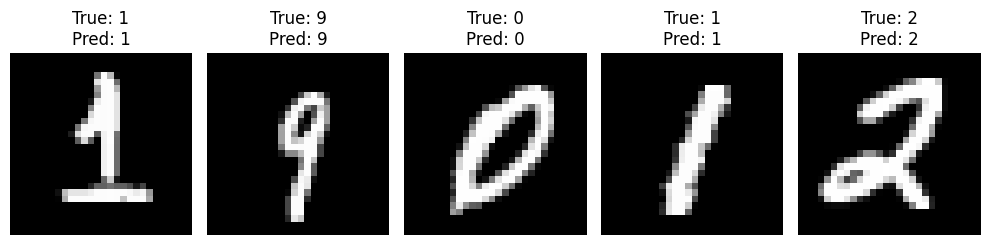

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# CNNs require a channel dimension (batch, height, width, channels)
x_train = x_train[..., np.newaxis]  # shape: (60000, 28, 28, 1)
x_test  = x_test[..., np.newaxis]

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_split=0.1, verbose=2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# Ensure >95% accuracy
assert test_acc > 0.95, "Model did not reach >95% test accuracy!"

# Predict on 5 random test images
sample_indices = np.random.choice(len(x_test), 5, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]
predictions = model.predict(sample_images)

# Visualize predictions
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"True: {sample_labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
!pip install spacy textblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all th

In [1]:
import spacy
from textblob import TextBlob

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Example user reviews
reviews = [
    "I love the Apple iPhone 13. The camera quality is amazing!",
    "The Samsung Galaxy S21 was disappointing. It lags too much.",
    "I bought a Sony headphone and the sound is incredible!",
    "Avoid buying the cheap Huawei phone. Battery drains fast.",
    "Logitech's new mouse is smooth and ergonomic. Totally worth it!"
]

# Process and analyze each review
for review in reviews:
    print("\n--- Review ---")
    print(review)

    # Run spaCy pipeline
    doc = nlp(review)

    # Extract named entities (brands, products)
    print("Entities:")
    for ent in doc.ents:
        print(f" - {ent.text} ({ent.label_})")

    # Rule-based sentiment using TextBlob
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    sentiment = "Positive" if polarity > 0.1 else "Negative" if polarity < -0.1 else "Neutral"
    print(f"Sentiment: {sentiment} (polarity = {polarity:.2f})")



--- Review ---
I love the Apple iPhone 13. The camera quality is amazing!
Entities:
 - Apple (ORG)
 - 13 (CARDINAL)
Sentiment: Positive (polarity = 0.62)

--- Review ---
The Samsung Galaxy S21 was disappointing. It lags too much.
Entities:
Sentiment: Negative (polarity = -0.20)

--- Review ---
I bought a Sony headphone and the sound is incredible!
Entities:
 - Sony (ORG)
Sentiment: Positive (polarity = 0.70)

--- Review ---
Avoid buying the cheap Huawei phone. Battery drains fast.
Entities:
 - Huawei (ORG)
Sentiment: Positive (polarity = 0.30)

--- Review ---
Logitech's new mouse is smooth and ergonomic. Totally worth it!
Entities:
 - Logitech (ORG)
Sentiment: Positive (polarity = 0.30)


In [4]:
!git clone https://github.com/Kawirambae/AI-model-tools.git
%cd AI-model-tools

# Save your notebook in repo folder
from shutil import copyfile
import os

# Get the default notebook path in Colab
# notebook_path = '/content/' + os.environ['COLAB_NOTEBOOK_NAME']
notebook_path = '/content/drive/MyDrive/' + 'AI_model_tools.ipynb' # Assuming the notebook is saved here.

copyfile(notebook_path, 'AI_model_tools.ipynb')

!git add .
!git commit -m "Added Colab notebook"
!git push

fatal: destination path 'AI-model-tools' already exists and is not an empty directory.
/content/AI-model-tools


KeyError: 'COLAB_NOTEBOOK_NAME'

In [5]:
!ls  # See what's already in your /content directory


In [10]:
from google.colab import files
files.download('AImodel.ipynb')


FileNotFoundError: Cannot find file: AImodel.ipynb